In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [2]:
df = pd.read_csv('credit_card_approval.csv')
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,F,Y,N,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,F,N,N,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,M,Y,Y,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,F,Y,Y,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,M,Y,Y,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


The `ID` is the id of the credit card holder/

In [5]:
# Examine the `ID` column of the dataset
id_count = df['ID'].value_counts()
id_gb = id_count.groupby(by=id_count.values).count()

plt.figure(figsize=(14, 6))
sns.barplot(id_gb)
plt.xticks(rotation=45)
plt.show()

1     236
2     646
3     695
4     854
5     730
     ... 
57    110
58     89
59    101
60    101
61     85
Name: ID, Length: 61, dtype: int64


KeyError: 0

<Figure size 1400x600 with 0 Axes>

Based on the graph, distribution of observations for each id is skewed to the right, meaning that most ids don't have that much observations on them (>=30).

The `CODE_GENDER` is the gender of the credit card holder, with `F` being female and `M` being male.

The number observations without property in the dataset: 333832
The number observations with property in the dataset: 203835


<Axes: >

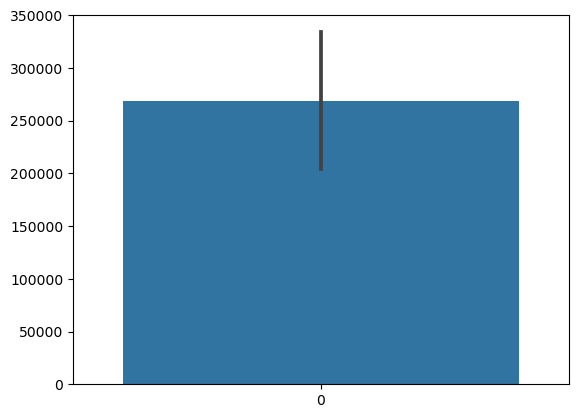

In [6]:
# Examine the `CODE_GENDER` column of the dataset
cg_count = df['CODE_GENDER'].value_counts()
print(f'The number observations without property in the dataset: {cg_count[0]}')
print(f'The number observations with property in the dataset: {cg_count[1]}')

sns.barplot(cg_count)

There's about twice amount of female credit card holder than male holder. Because it is a non-ordinal categorical value, we will perform one-hot encoding on the column.

The `FLAG_OWN_CAR` is about whether the credit card holder has a car, with `Y` being yes and `N` being no.

The number observations without property in the dataset: 306207
The number observations with property in the dataset: 231460


/tmp/ipykernel_1569/2975312782.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'The number observations without property in the dataset: {foc_count[0]}')
/tmp/ipykernel_1569/2975312782.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'The number observations with property in the dataset: {foc_count[1]}')


<Axes: xlabel='FLAG_OWN_CAR', ylabel='count'>

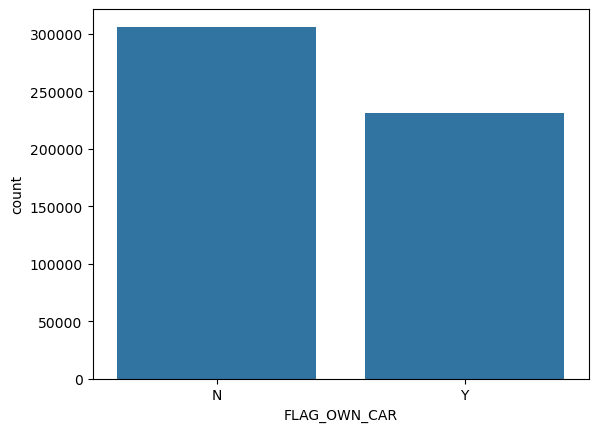

In [5]:
# Examine the `FLAG_OWN_CAR` column of the dataset
foc_count = df['FLAG_OWN_CAR'].value_counts()
print(f'The number observations without property in the dataset: {foc_count[0]}')
print(f'The number observations with property in the dataset: {foc_count[1]}')

sns.barplot(foc_count)

THe difference between the values are not as signifcant as other columns, there for the distribution is not a huge concern. Because it is a non-ordinal categorical value, we will perform one-hot encoding on the column.

The `FLAG_OWN_REALTY` is about whether the credit card holder has a property, with `Y` being yes and `N` being no.

/tmp/ipykernel_1569/2368580456.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'The number observations without property in the dataset: {for_count[1]}')
/tmp/ipykernel_1569/2368580456.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'The number observations with property in the dataset: {for_count[0]}')


The number observations without property in the dataset: 192196
The number observations with property in the dataset: 345471


<Axes: xlabel='FLAG_OWN_REALTY', ylabel='count'>

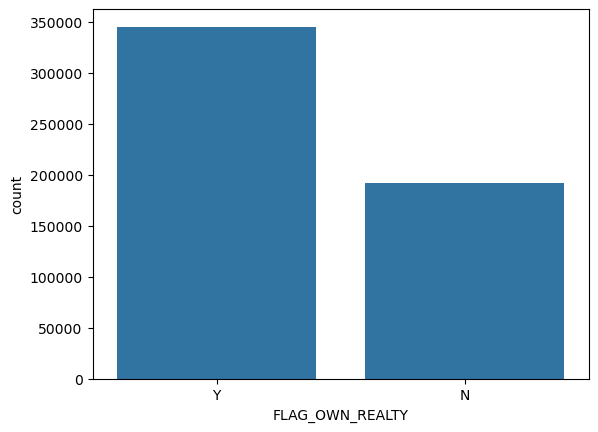

In [6]:
# Examine the `FLAG_OWN_REALTY` column of the dataset
for_count = df['FLAG_OWN_REALTY'].value_counts()
print(f'The number observations without property in the dataset: {for_count[1]}')
print(f'The number observations with property in the dataset: {for_count[0]}')

sns.barplot(for_count)

Although there are still significantly more observations with property, the difference is less drastic compared to some other columns. Because it is a non-ordinal categorical value, we will perform one-hot encoding on the column.

The `CNT_CHILDREN` column is about how many children the credit card holder of the observation has, which ranges from no children to 2 or more children.

CNT_CHILDREN
No children    343151
1 children     127695
2+ children     66821
Name: count, dtype: int64


<Axes: xlabel='CNT_CHILDREN', ylabel='count'>

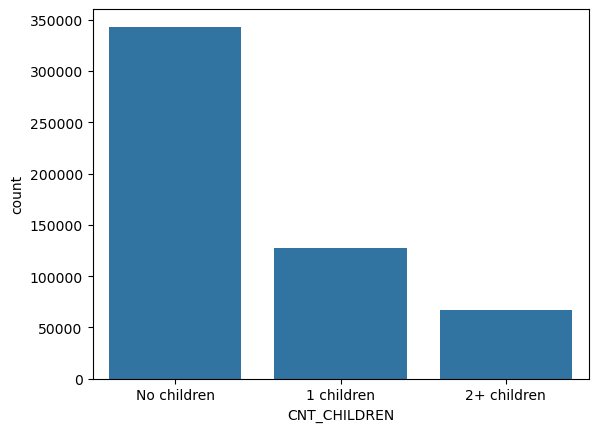

In [7]:
# Examine the `CNT_CHILDREN` column of the dataset
cc_count = df['CNT_CHILDREN'].value_counts()
print(cc_count)

sns.barplot(cc_count)

There are significantly more observation belonging to `No children` category than other categories. This is yet another categorical column, in which we could use either one-hot encoding or ordinal encoding. In this case, we are more inclined to do ordinal encoding since `2+ children` can be considered more "significant" than `No children`.

The `FLAG_EMAIL` column contains whether there is an email, `1` being yes and `0` being no.

The number observations without email in the dataset: 483508
The number observations with email in the dataset: 54159


<Axes: xlabel='FLAG_EMAIL', ylabel='count'>

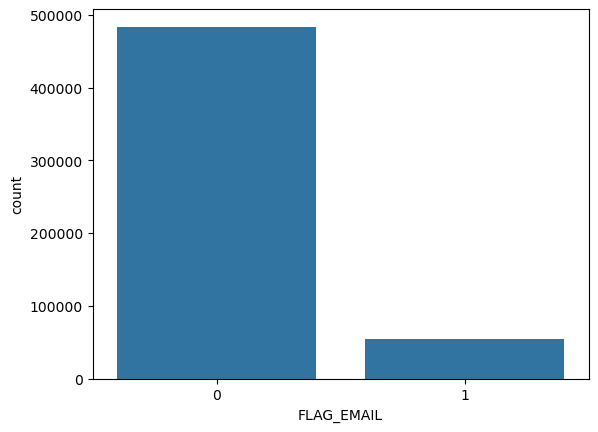

In [8]:
# Examine the `FLAG_EMAIL` column of the dataset
fe_count = df['FLAG_EMAIL'].value_counts()
print(f'The number observations without email in the dataset: {fe_count[0]}')
print(f'The number observations with email in the dataset: {fe_count[1]}')

sns.barplot(fe_count)

As seen from the numbers and the visualization, there are significantly more observations of users without email than with email. Due to the significant difference in the observations, we may need to take into consideration the ratio of with vs. without users in the training set so our model is not skrewed. 

The `JOB` column denotes the job of the credit holder, represented by strings of the name of the occupation.

JOB
Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: count, dtype: int64


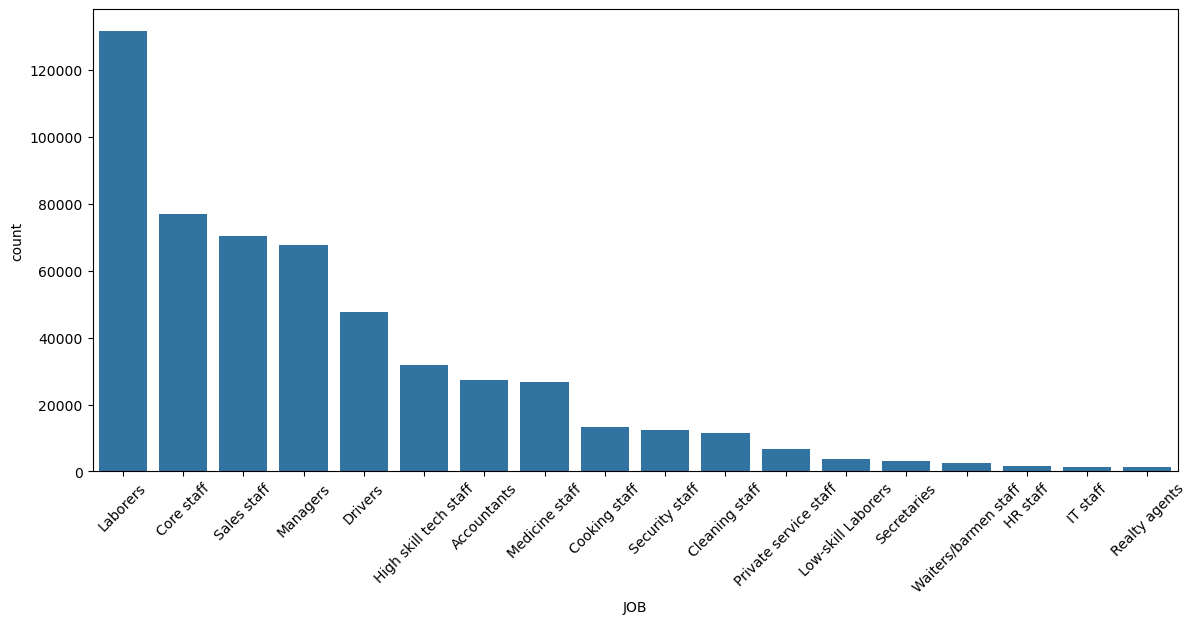

In [9]:
# Examine the `JOB` column of the dataset
job_count = df['JOB'].value_counts()
print(job_count)

plt.figure(figsize=(14, 6))
sns.barplot(job_count)
plt.xticks(rotation=45)
plt.show()

It seems that there's a uneven distribution of occupations. However, it may be due to a variety of reasons such as newer positions has less observations for them because of how new they are.

The `BEGIN_MONTHS` column of the dataset represents how long ago was the observation from with `0` being the closes month and the smallest value being the furtherest month

BEGIN_MONTHS
-60      207
-59      431
-58      668
-57      858
-56     1080
       ...  
-4     16795
-3     17061
-2     17203
-1     17271
 0     17043
Name: count, Length: 61, dtype: int64


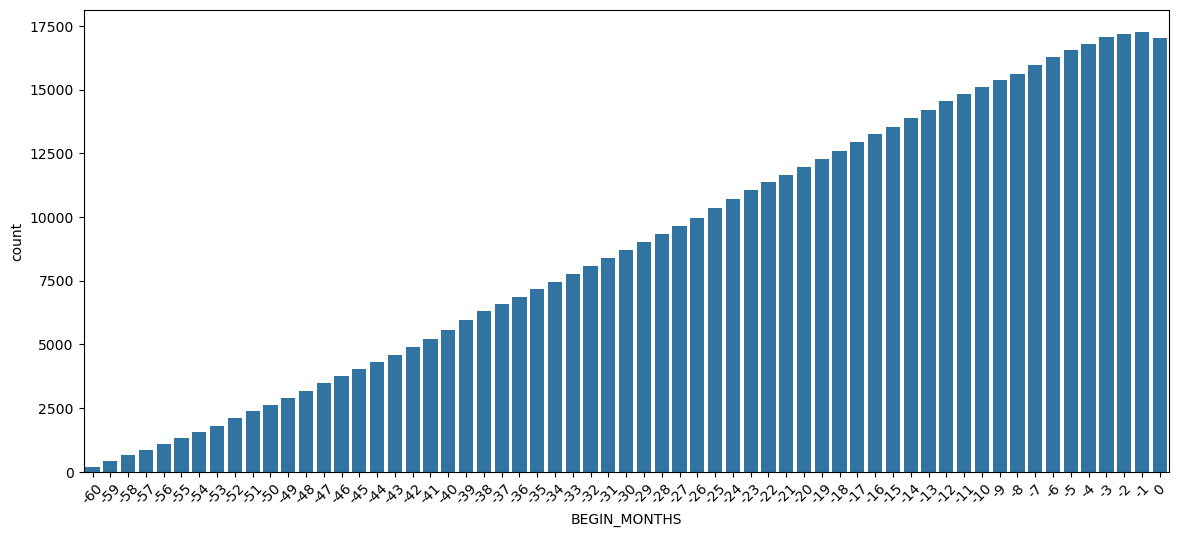

In [10]:
# Examine the `BEGIN_MONTHS` column of the dataset
BM_count = df['BEGIN_MONTHS'].value_counts().sort_index()
print(BM_count)

plt.figure(figsize=(14, 6))
sns.barplot(BM_count)
plt.xticks(rotation=45)
plt.show()

By looking at the graph and the numbers, the distribution of the data is skrewed towards one side. It is a categorical value so we would need to encode it if we do end up choosing it. If so, it is likely to be one-hot encoding since the one month after/before does not have significant more/less meaning in the question that we are trying to ask.

The `STATUS` column of the dataset uses `0`, `1`, `2`, `3`, `4`, `5`, `C`, and `X` to represent how late the payments to credit cards are:

- `0`: 1-29 days past due

- `1`: 30-59 days past due

- `2`: 60-89 days overdue

- `3`: 90-119 days overdue

- `4`: 120-149 days overdue

- `5`: Overdue or bad debts, write-offs for more than 150 days

- `C`: paid off that month

- `X`: No loan for the month

Although the column contains numerical values, but they are categorical values instead.

STATUS
0    200930
1      6423
2       542
3       181
4       152
5      1087
C    226185
X    102167
Name: count, dtype: int64


<Axes: xlabel='STATUS', ylabel='count'>

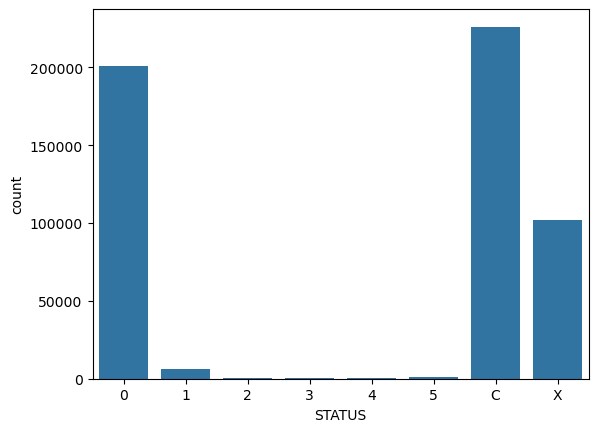

In [11]:
# Examine the `STATUS` column of the dataset
status_count = df['STATUS'].value_counts().sort_index()
print(status_count)
sns.barplot(status_count)

Based on the numbers and the graph, the `STATUS` column is dominated by three categories of observations, which are `0`, `C`, and `X`. To work with the column, not only will we need to encode the categorical values (one-hot or ordinal), but we also need to make sure the training set contains a fair proportion of every category. 

The `TARGET` column of the dataset uses `1` to mark risk users and use `0` otherwise

The number of risk users in the dataset: 535705
The number of non-risk users in the dataset: 1962


<Axes: xlabel='TARGET', ylabel='count'>

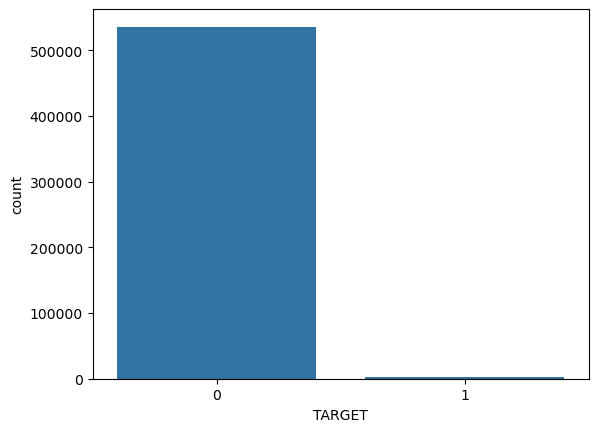

In [12]:
# Examine the `TARGET` column of the dataset
target_count = df['TARGET'].value_counts()
print(f'The number of risk users in the dataset: {target_count[0]}')
print(f'The number of non-risk users in the dataset: {target_count[1]}')

sns.barplot(target_count)

As seen from the numbers and the visualization, there are significantly more observations of non-risk users than risk users. Due to the significant difference in the observations, we may need to take into consideration the ratio of risk vs. non-risk users in the training set so our model is not skrewed. 